In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier, MLPRegressor


In [4]:
adult_df = pd.read_csv('adult.csv')
adult_df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
adult_df.shape


(32561, 15)

In [6]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
adult_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


**DATA VISUALISATION**

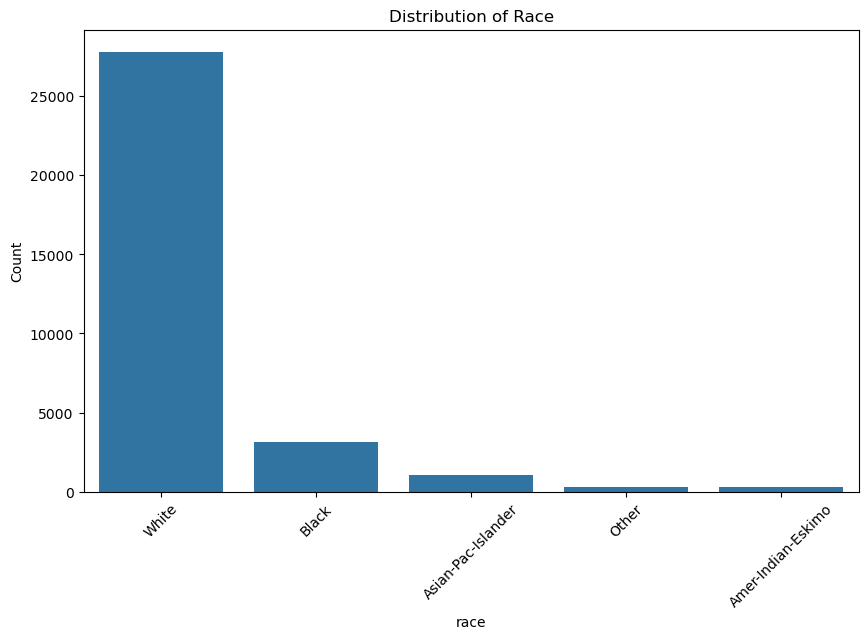

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=adult_df, x='race')
plt.title('Distribution of Race')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

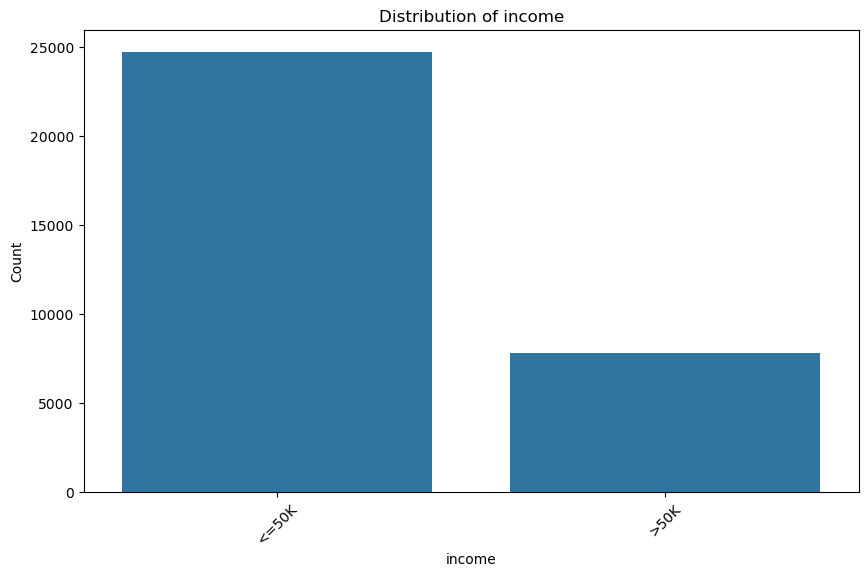

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=adult_df, x='income')
plt.title('Distribution of income')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

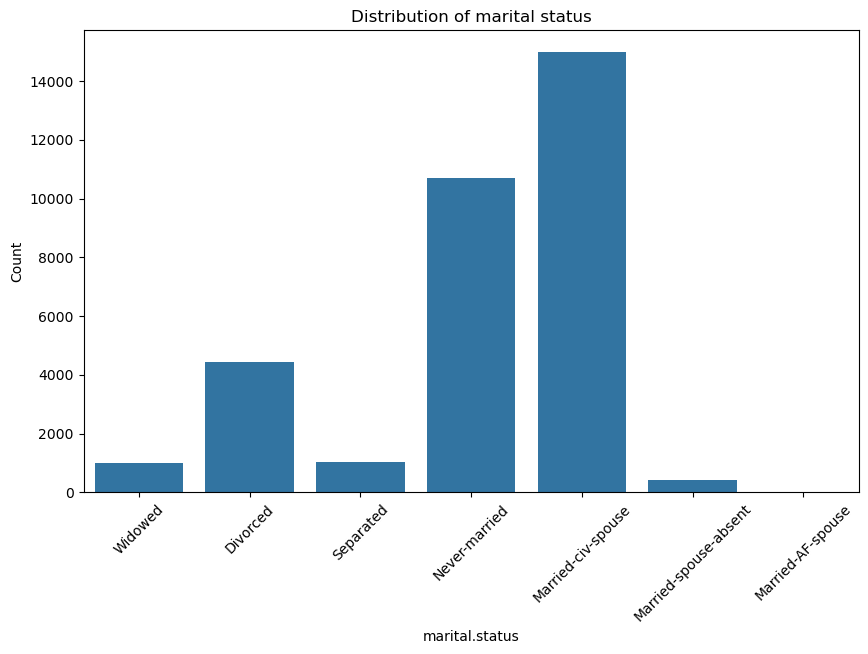

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=adult_df, x='marital.status')
plt.title('Distribution of marital status')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

In [11]:
adult_df =pd.get_dummies(adult_df, columns=['workclass', 'education', 'marital.status', 'occupation', 
    'relationship', 'race', 'sex', 'native.country'])

adult_df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,4356,40,<=50K,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,82,132870,9,0,4356,18,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,66,186061,10,0,4356,40,<=50K,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,54,140359,4,0,3900,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,41,264663,10,0,3900,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [12]:
from sklearn.preprocessing import MinMaxScaler


scaler= MinMaxScaler() 

In [13]:
# adult_df[['age','education.num','capital.gain','capital.loss','hours.per.week']]= scaler.fit_transform(
#     adult_df[['age','education.num','capital.gain','capital.loss','hours.per.week']])

In [14]:
adult_df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia
0,90,77053,9,0,4356,40,<=50K,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,82,132870,9,0,4356,18,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,66,186061,10,0,4356,40,<=50K,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,54,140359,4,0,3900,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,41,264663,10,0,3900,40,<=50K,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [15]:
X = adult_df.drop(columns=['income','fnlwgt'])
y = adult_df['income'] 

X_train , X_test, y_train , y_test = train_test_split(X,y ,test_size= 0.2 , random_state= 42)

In [16]:
models = [RandomForestClassifier() , 
          DecisionTreeClassifier()] 

for model in models : 
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(model)
    print(classification_report(y_test, y_pred))

RandomForestClassifier()
              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      4976
        >50K       0.70      0.61      0.65      1537

    accuracy                           0.85      6513
   macro avg       0.79      0.77      0.78      6513
weighted avg       0.84      0.85      0.84      6513

DecisionTreeClassifier()
              precision    recall  f1-score   support

       <=50K       0.88      0.89      0.89      4976
        >50K       0.63      0.61      0.62      1537

    accuracy                           0.82      6513
   macro avg       0.76      0.75      0.75      6513
weighted avg       0.82      0.82      0.82      6513



In [17]:
clf = RandomForestClassifier(class_weight="balanced")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('random forest')
print(classification_report(y_test,y_pred))

random forest
              precision    recall  f1-score   support

       <=50K       0.89      0.91      0.90      4976
        >50K       0.69      0.64      0.66      1537

    accuracy                           0.85      6513
   macro avg       0.79      0.78      0.78      6513
weighted avg       0.84      0.85      0.85      6513



In [18]:
# Step 2: Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 3: Train the classifier on the resampled dataset
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Step 4: Make predictions
y_pred = clf.predict(X_test)

# Step 5: Evaluate the model
print(classification_report(y_test, y_pred))

/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


              precision    recall  f1-score   support

       <=50K       0.89      0.89      0.89      4976
        >50K       0.66      0.65      0.65      1537

    accuracy                           0.84      6513
   macro avg       0.77      0.77      0.77      6513
weighted avg       0.84      0.84      0.84      6513



In [19]:
from imblearn.under_sampling import RandomUnderSampler
# Step 1: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Apply Undersampling
undersample = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

# Step 3 (Optional): Apply SMOTE on the undersampled dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_under, y_train_under)

# Step 4: Train the classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_balanced, y_train_balanced)

# Step 5: Make predictions
y_pred = clf.predict(X_test)

# Step 6: Evaluate the model
print(classification_report(y_test, y_pred))


/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


              precision    recall  f1-score   support

       <=50K       0.93      0.80      0.86      4945
        >50K       0.57      0.82      0.67      1568

    accuracy                           0.81      6513
   macro avg       0.75      0.81      0.77      6513
weighted avg       0.85      0.81      0.82      6513



In [24]:
# Train and evaluate SVM and KNN classifiers
classifiers = {
    #'SVM': SVC(random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5, weights='distance', metric='manhattan')
}

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Print classification report
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))


KNN Classification Report:
              precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89      4945
        >50K       0.67      0.63      0.65      1568

    accuracy                           0.84      6513
   macro avg       0.78      0.77      0.77      6513
weighted avg       0.83      0.84      0.84      6513



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': list(range(3, 9, 2)),  # Test odd values
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski' , 'hamming']
}

grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='f1_weighted')
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
